In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [120]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv') 

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
print(df.count())
df_test.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [123]:
print(df.isnull().sum())
df_test.isnull().sum() #1 missing value in fare as well

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Conclusion of Feature Analysis
Features: The titanic dataset has roughly the following types of features:

Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority. 

Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

Binary: A subtype of categorical features, where the variable has only two categories. 

Eg: Sex (Male/Female)

Ordinal: They are similar to categorical features but they have an order(i.e can be sorted). 

Eg. Pclass (1, 2, 3)

Continuous: They can take up any value between the minimum and maximum values in a column. 

Eg. Age, Fare

Count: They represent the count of a variable. 

Eg. SibSp, Parch

Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.

# Graphical Analysis

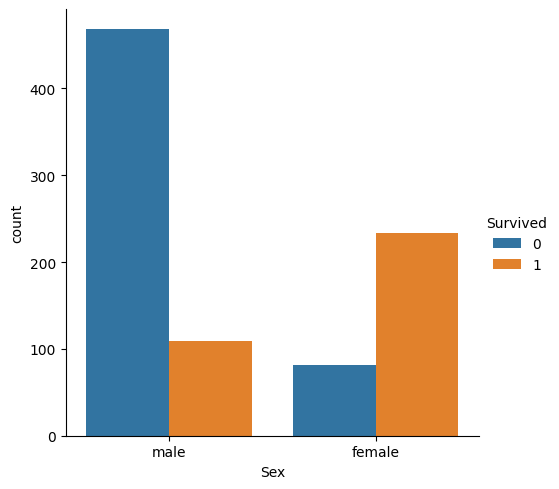

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.catplot(x='Sex',hue="Survived",kind='count',data=df)

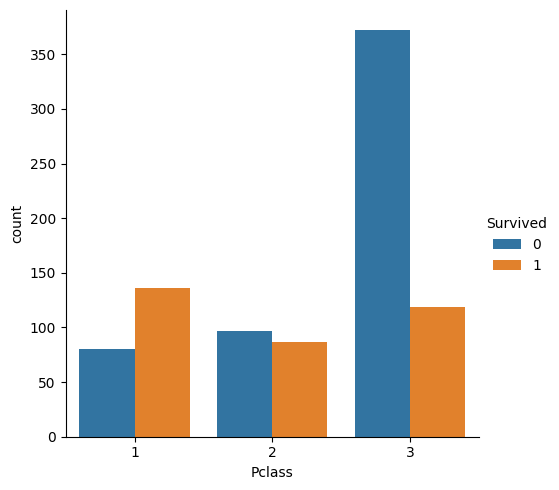

In [66]:
# group = df.groupby(['Pclass','Survived'])
# pclass_survived = group.size().unstack()
sns.catplot(x='Pclass',hue="Survived",kind='count',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

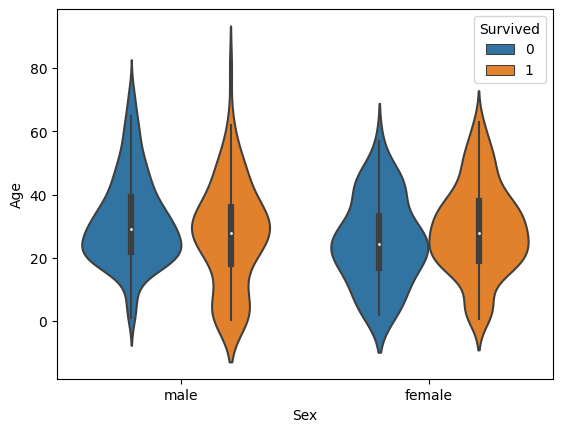

In [69]:
sns.violinplot(x='Sex',y='Age',hue="Survived",kind='count',data=df)

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

Good for children.
High for women in the age range 20-50.
Less for men as the age increases.

Since Age column is important, the missing values need to be filled,

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


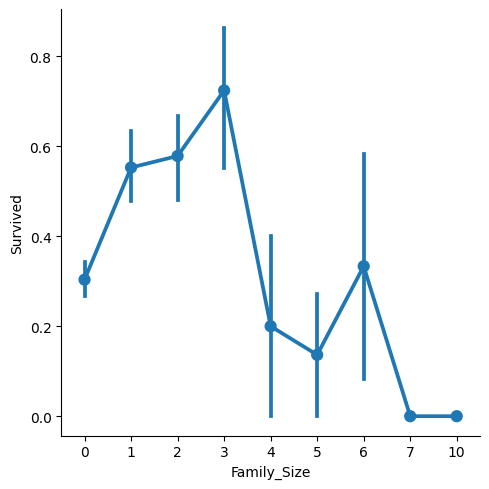

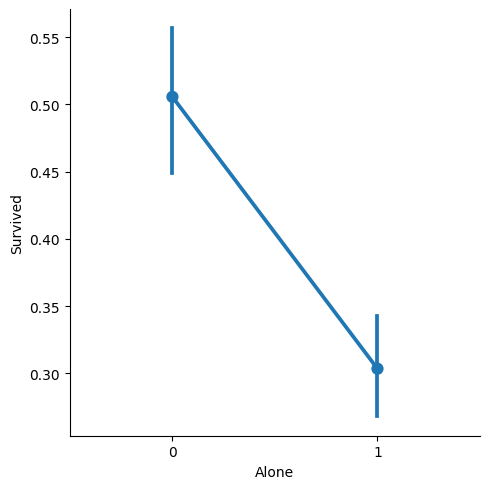

In [124]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']
df['Alone']=0
df.loc[df.Family_Size==0,'Alone']=1
df_test['Family_Size'] = 0
df_test['Family_Size'] = df['Parch']+df['SibSp']
df_test['Alone']=0
df_test.loc[df_test.Family_Size==0,'Alone']=1
sns.factorplot(x='Family_Size',y='Survived',data=df)
sns.factorplot(x='Alone',y='Survived',data=df)

Important observations – 

If a passenger is alone, the survival rate is less.
If the family size is greater than 5, chances of survival decrease considerably.

In [ ]:
df['Fare_range']=pd.qcut(df['Fare'],4)
df_test['Fare_range']=pd.qcut(df_test['Fare'],4)
sns.barplot(x='Fare_range',y='Survived',data=df)


Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

In [146]:
df['Embarked'].fillna('S',inplace=True)
df_test['Embarked'].fillna('S',inplace=True)




In [ ]:
df.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)
df_test.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)

In [149]:
print(df.isnull().sum())
df_test.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
Family_Size      0
Alone            0
Fare_range       0
dtype: int64


Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
Family_Size     0
Alone           0
Fare_range      1
dtype: int64

In [108]:
# Filling in missing Value of Age
df[df['SibSp']==0].describe() #mean age = 31
df[df['SibSp']==1].describe() #mean age = 30
df[df['SibSp']==2].describe() #mean age = 22
df[df['SibSp']==3].describe() #mean age = 13
df[df['SibSp']==4].describe() #mean age = 7
df[df['SibSp']==5].describe() #mean age = 10
df[df['SibSp']==6].describe() #mean age = NAN
df[df['SibSp']==7].describe() #mean age = NAN
df[df['SibSp']==8].describe() #mean age = NAN 
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,0.135207
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,0.198270
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,-0.584471
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,-0.583398
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,-0.271832
Family_Size,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,-0.690922
Alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,-0.690922,1.000000


# Problems faced while investigating Null Age values  
1. Sibsp is varying and hence there is not equal distribution for all the categories and hence using mean can be vague
2. There are a lot of NAN values about 19.86 %
3. Age is inversely correlated to Pclass and SibSp both 

In [118]:
# plotting age and pclass
df['Age_range']=pd.qcut(df['Age'],3)
group = df.groupby(['Pclass','SibSp','Age_range'])
pclass_age = group.size().unstack()
pclass_age

Age_range     (0.419, 23.0]  (23.0, 34.0]  (34.0, 80.0]
Pclass SibSp                                           
1      0                 16            29            68
       1                 12            11            42
       2                  2             0             3
       3                  2             1             0
       4                  0             0             0
       5                  0             0             0
       8                  0             0             0
2      0                 28            42            39
       1                 16            25            14
       2                  4             4             0
       3                  0             1             0
       4                  0             0             0
       5                  0             0             0
       8                  0             0             0
3      0                103            92            54
       1                 26            23            14
       2                  7             3             2
       3                  7             1             0
       4                 18             0             0
       5                  5             0             0
       8                  0             0             0

In [117]:
# We can try filling Age according to Pclass ans SibSp
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64